In [1]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston',version=1)
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [2]:
X = boston.data.to_numpy().astype(float)
Y = boston.target.to_numpy().astype(float)

print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [3]:
import numpy as np
import torch

np.random.seed(123)
torch.random.manual_seed(123)
idx = np.random.permutation(len(X))

In [4]:
X = X[idx]
Y = Y[idx]

In [5]:
X_training = torch.Tensor(X[50:])
Y_training = torch.Tensor(Y[50:])
X_testing = torch.Tensor(X[50:])
Y_testing = torch.Tensor(Y[50:])

In [6]:
theta = torch.Tensor(13)
theta_0 = torch.Tensor(1)

theta.requires_grad_(True)
theta_0.requires_grad_(True)

theta.data.normal_(0,0.1)
theta_0.data.normal_(0,0.1)

print(theta)
print(theta_0)

tensor([-0.0111,  0.0120, -0.0370, -0.0240, -0.1197,  0.0209, -0.0972, -0.0755,
         0.0324, -0.0109,  0.0210, -0.0391,  0.0235], requires_grad=True)
tensor([0.0665], requires_grad=True)


In [7]:
def linear_regression(input, theta, theta_0):
    return input.mul(theta).sum(1)+theta_0

In [8]:
res = X_training.mul(theta)
print(res,res.shape)

tensor([[-6.2912e-04,  4.8145e-01, -2.3694e-01,  ...,  3.7018e-01,
         -1.5513e+01,  8.2946e-02],
        [-6.7404e-04,  0.0000e+00, -9.0930e-02,  ...,  3.7439e-01,
         -1.5130e+01,  3.0899e-01],
        [-7.0198e-03,  0.0000e+00, -3.0088e-01,  ...,  4.4170e-01,
         -1.5513e+01,  1.9409e-01],
        ...,
        [-3.9141e-03,  0.0000e+00, -2.7279e-01,  ...,  4.1225e-01,
         -1.5513e+01,  1.8093e-01],
        [-1.0241e-01,  0.0000e+00, -6.6904e-01,  ...,  4.2487e-01,
         -1.5513e+01,  5.5454e-01],
        [-5.0783e-02,  0.0000e+00, -6.6904e-01,  ...,  4.2487e-01,
         -1.3863e+01,  1.6730e-01]], grad_fn=<MulBackward0>) torch.Size([456, 13])


In [9]:
res = res.sum(1)
print(res.shape)

torch.Size([456])


In [10]:
res = res + theta_0
print(res.shape)

torch.Size([456])


In [11]:
res=X_training.mul(theta).sum(1)+theta_0
print(res.shape)

torch.Size([456])


In [12]:
y = linear_regression(X_training,theta,theta_0)
print(y[:10])

tensor([-20.8190, -23.3360, -24.6247, -31.4600, -27.4998, -28.1950, -27.1047,
        -26.2724, -18.8539, -31.4594], grad_fn=<SliceBackward0>)


In [13]:
print(Y_training[:10])

tensor([32.4000, 29.6000, 20.4000, 12.3000, 19.1000, 14.9000, 17.8000,  8.8000,
        35.4000, 11.5000])


In [14]:
def loss(input,target):
    return((input-target)**2).mean()

In [15]:
print(loss(y,Y_training))

tensor(2274.0801, grad_fn=<MeanBackward0>)


In [16]:
means = X_training.mean(0)
stds = X_training.std(0)
print(means,stds)

tensor([3.5481e+00, 1.1293e+01, 1.1224e+01, 6.1404e-02, 5.5591e-01, 6.2701e+00,
        6.8338e+01, 3.7963e+00, 9.5658e+00, 4.0893e+02, 1.8468e+01, 3.5775e+02,
        1.2820e+01]) tensor([8.4949e+00, 2.3287e+01, 6.9195e+00, 2.4033e-01, 1.1805e-01, 6.9616e-01,
        2.8338e+01, 2.1295e+00, 8.7019e+00, 1.6880e+02, 2.1430e+00, 9.0201e+01,
        7.1928e+00])


In [17]:
X_training_norm=(X_training-means)/stds

In [18]:
print(X_training_norm.mean(0))
print(X_training_norm.std(0))


tensor([ 0.0000e+00,  7.3199e-09,  1.2914e-07,  2.0914e-09,  3.1685e-07,
        -4.2664e-07,  9.5158e-08,  1.2444e-07,  1.7777e-08,  2.1437e-08,
        -2.1332e-07, -1.1503e-07,  1.6731e-07])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000])


In [19]:
X_testing_norm = (X_testing-means)/stds

In [20]:
lr = 0.1
epochs = 10

means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds

theta = torch.Tensor(13)
theta_0=torch.Tensor(1)
theta.normal_(0,0.01)
theta_0.normal_(0,0.01)

theta.requires_grad_(True)
theta_0.requires_grad_(True)

for e in range(epochs):
    y = linear_regression(X_training_norm,theta,theta_0)
    l = loss(y, Y_training)
    l.backward()
    print("Epoch: {}, loss: {:0.2f}".format(e,l.item()))


Epoch: 0, loss: 576.30
Epoch: 1, loss: 576.30
Epoch: 2, loss: 576.30
Epoch: 3, loss: 576.30
Epoch: 4, loss: 576.30
Epoch: 5, loss: 576.30
Epoch: 6, loss: 576.30
Epoch: 7, loss: 576.30
Epoch: 8, loss: 576.30
Epoch: 9, loss: 576.30


In [21]:
lr = 0.1
epochs = 50

means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds

theta = torch.Tensor(13)
theta_0=torch.Tensor(1)
theta.normal_(0,0.01)
theta_0.normal_(0,0.01)

theta.requires_grad_(True)
theta_0.requires_grad_(True)

losses = []

for e in range(epochs):
    y = linear_regression(X_training_norm,theta,theta_0)
    l = loss(y, Y_training)
    l.backward()
    losses.append(l.item())
    theta.data.sub_(lr*theta.grad.data)
    theta_0.data.sub_(lr*theta_0.grad.data)

    theta.grad.data.zero_()
    theta_0.grad.data.zero_()

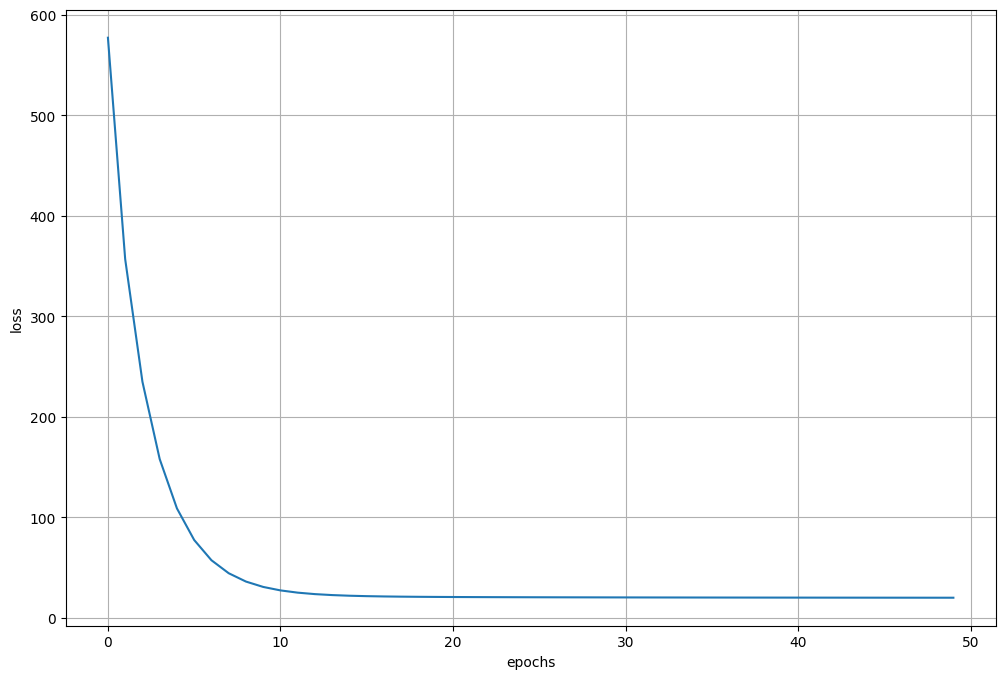

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [23]:
yt=linear_regression(X_testing_norm,theta,theta_0)
print(loss(yt,Y_testing))

tensor(20.1878, grad_fn=<MeanBackward0>)


In [24]:
lr = 0.1
epochs = 50

means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds

theta = torch.Tensor(13)
theta_0=torch.Tensor(1)
theta.normal_(0,0.01)
theta_0.normal_(0,0.01)

theta.requires_grad_(True)
theta_0.requires_grad_(True)

losses = []

for e in range(epochs):
    y = linear_regression(X_training_norm,theta,theta_0)
    l = loss(y, Y_training)
    l.backward()
    losses.append(l.item())
    theta.data.sub_(lr*theta.grad.data)
    theta_0.data.sub_(lr*theta_0.grad.data)

    theta.grad.data.zero_()
    theta_0.grad.data.zero_()